# A tour of geoms
*August 29, 2019 and September 3, 2019*

## Table of Contents
1. Bars
   1. Basic bar chart
   1. Bar chart assumes height to be count
   1. How to base height on a variable that is not count
      1. Instead of y=, use weight= (calculates sum of given variable)
      1. Create new variable that represents desired measure (use stat=identity)
   1. Sort bars by height
   1. Angle axis text for readability
   1. Flip and create horizontal bar chart
1. Lines
   1. Plot basic line
   1. Plot by category
   1. Plot by category with legend
1. Smooth
   1. Plot loess line on scatterplot
   1. Plot loess line by group
1. Tiles
   1. Created basic heatmap
   1. Created scaled variable
   1. Changed outline of squares
   1. Changed color gradient
1. Distributions: Points with jitter
   1. Basic jitter
   1. Boxplot overlaid over points with jitter
1. Extra Code

In [1]:
library('tidyverse')

# Create df.sorted
df = mpg %>%
    group_by(class) %>%
    summarize(sum_displ = sum(displ))
df.sorted = df %>% mutate(class = fct_reorder(class, sum_displ))

# Generate test data with 2 categories
test.data = data.frame(
    cat1 = 100 + c(0, cumsum(runif(49, -20, 20))),
    cat2 = 150 + c(0, cumsum(runif(49, -10, 10))),
    date = seq(as.Date("2002-01-01"), by="1 month", length.out=100)
) %>% gather(category, value, -date)

# Import nba.data and create scaled variable based on value
nba.data = read.csv("http://datasets.flowingdata.com/ppg2008.csv") %>%
    gather(stat, value, -Name) %>%
    group_by(stat) %>%
    mutate(value.scaled = scales::rescale(value))


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Bars

In [2]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### Basic Bar Chart

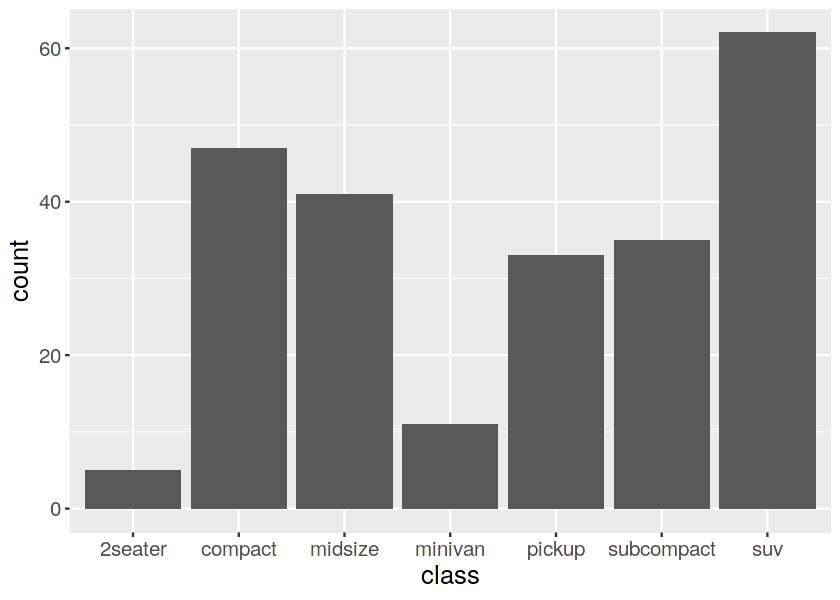

In [3]:
# Bar chart assumes height to be based on count of x variable

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(mpg, aes(x = class))
p = p + geom_bar()
p = p + theme(text=element_text(size=15))
p

### Bar Chart of not counts: Method 1


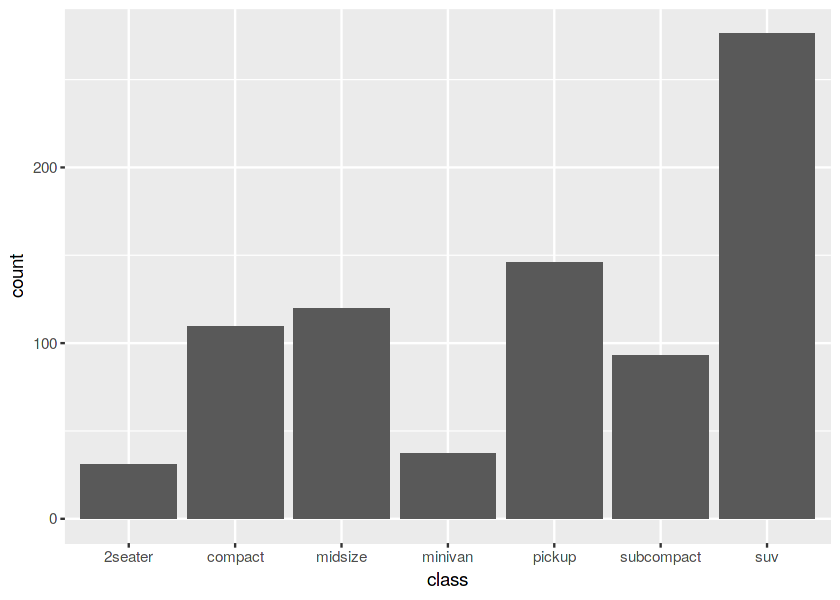

In [4]:
# This method creates bar chart where height of bar is based on the sum of the variable given 
# In this case, the height of the bar represents the sum of engine displacement

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(mpg, aes(x=class, weight=displ))
p = p + geom_bar()
p

### Bar Chart of not counts: Method 2
*Featuring reordering and angled text*


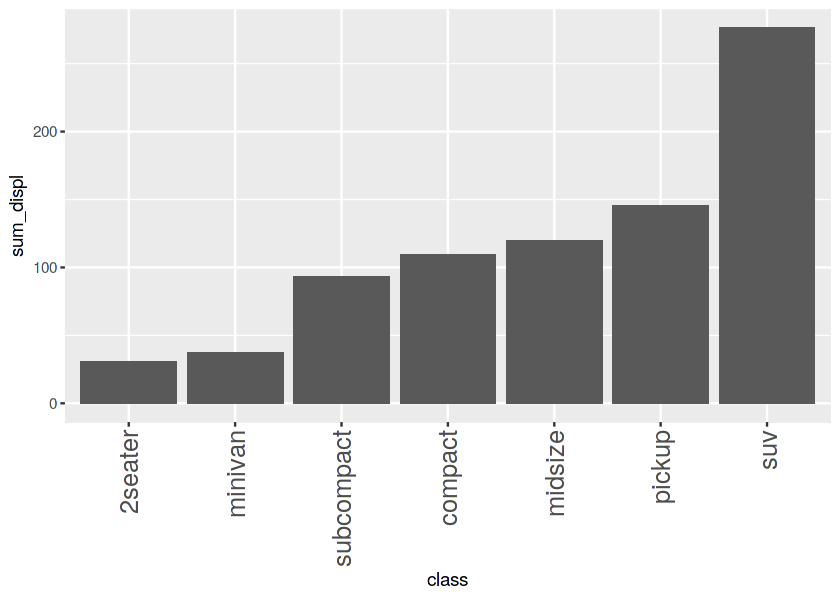

In [5]:
# Another way to graph things besides counts is to make a variable representing your desired measure
# See data manipulation at top
# Using the summarize function, we make a new variable called sum_displ in the new dataset df.sorted that represents 
# sum of the displ (engine displacement) for each class
# Be sure to pass the identity argument into geom_bar, that tells it to map the value of the given variable
# We also resorted bars to be in ascending order and rotated the x-axis text
# For readbility, we also flipped the coordinates to be horizontal bars

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(df.sorted, aes(x = class, y = sum_displ))
p = p + geom_bar(stat = 'identity')
p = p + theme(axis.text.x = element_text(size=15, angle = 90, hjust = 1, vjust = 0.5))
p

### Coordinate Plane Flip

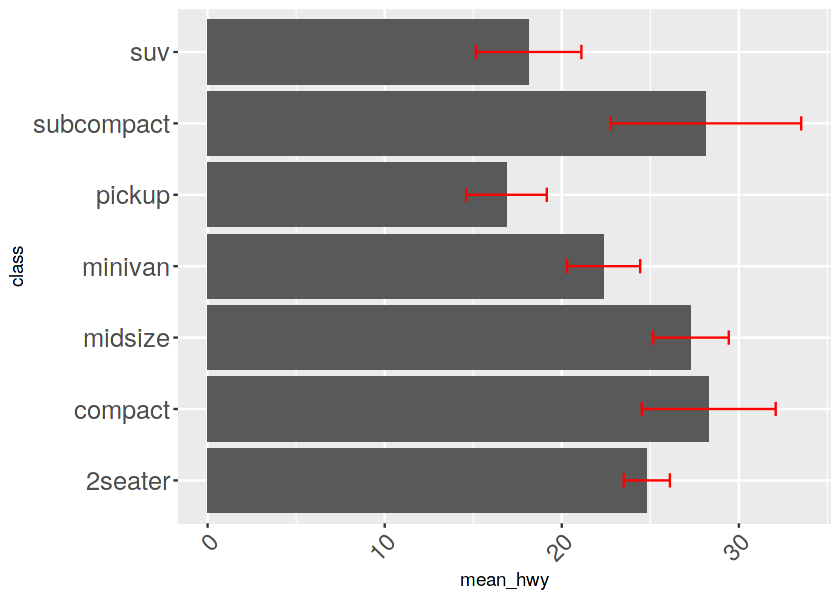

In [7]:
# For readability, we flipped the coordinate plane

options(repr.plot.width=7, repr.plot.height=5)
p = p + theme(axis.text.y = element_text(size=15))
p = p + coord_flip()
p

## Lines

In [8]:
test.data %>% head

date,category,value
<date>,<chr>,<dbl>
2002-01-01,cat1,100.00000
2002-02-01,cat1,92.51752
2002-03-01,cat1,77.75663
2002-04-01,cat1,96.77143
2002-05-01,cat1,98.82903
2002-06-01,cat1,84.94402


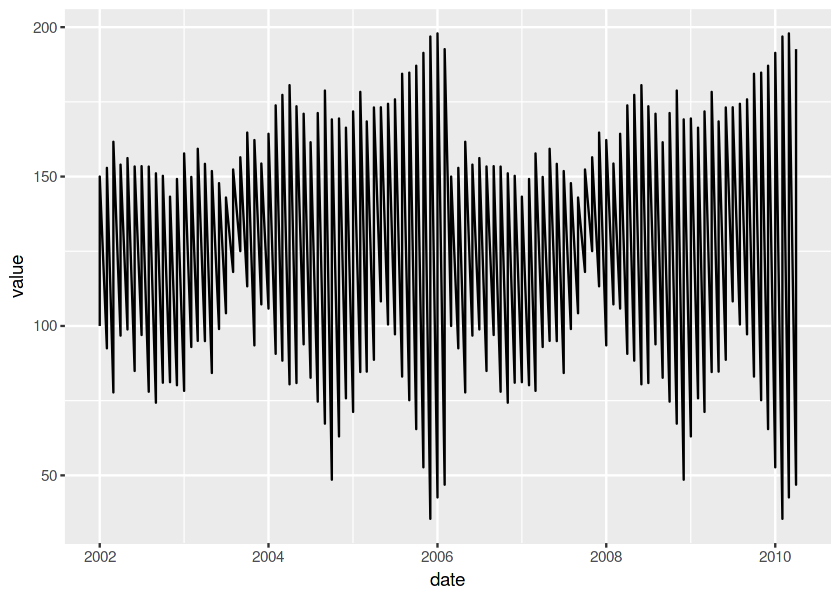

In [9]:
# Plotted line of two categories
# Not helpful depicting as the two categories are connected

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(test.data, aes(x = date, y = value))
p = p + geom_line()
p


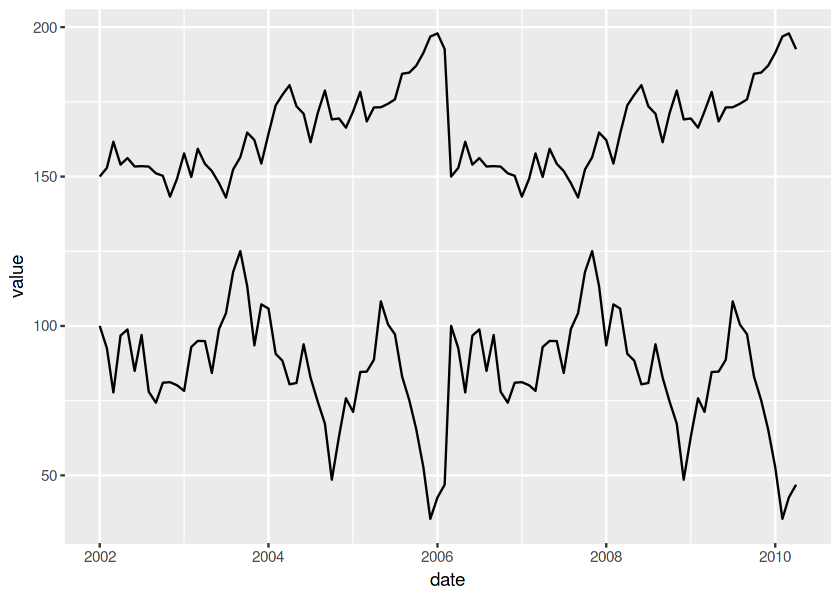

In [10]:
# Plot categories separately
# Hard to distinguish which line represents what

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(test.data, aes(x = date, y = value, group = category))
p = p + geom_line()
p

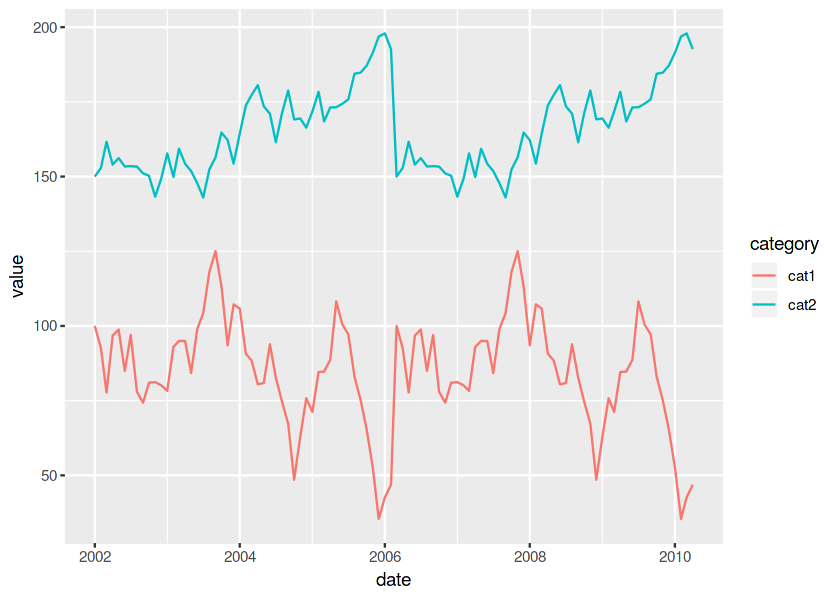

In [11]:
# Plot categories separately with legend!

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(test.data, aes(x = date, y = value, color = category))
p = p + geom_line()
p

### Smooth

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



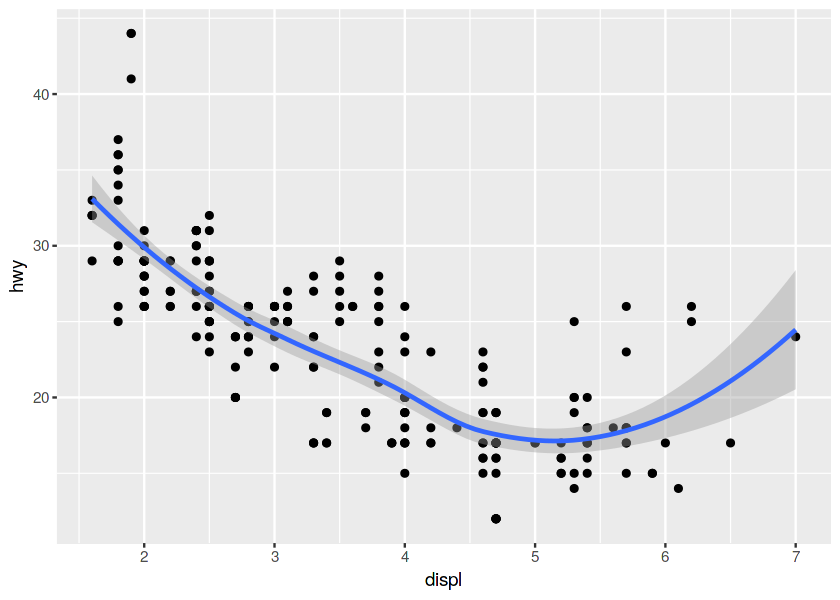

In [12]:
# Create basic loess line for scatterplot of displ vs hwy

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(mpg, aes(x = displ, y = hwy))
p = p + geom_point()
p = p + geom_smooth()
p

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



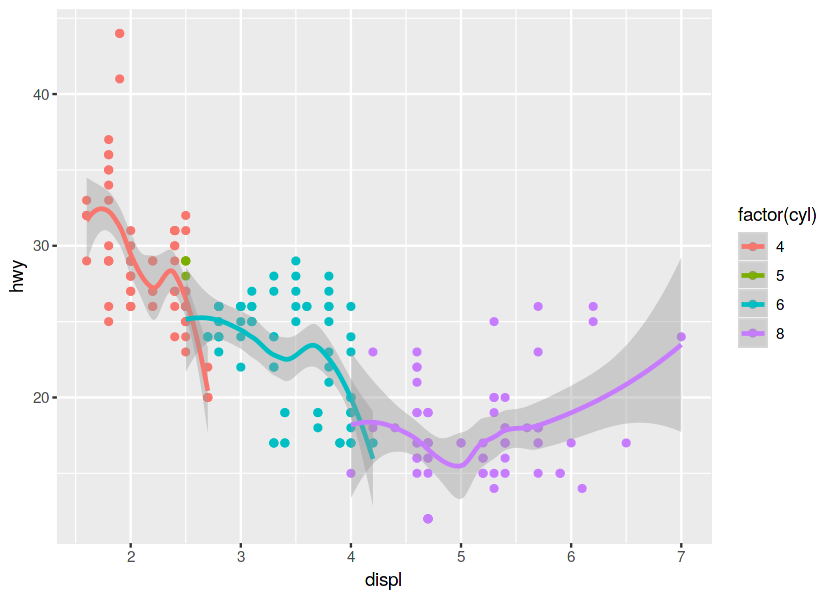

In [13]:
# Create smooth line by cyl
# geom_smooth respects your grouping and plots separate lines for each group

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(mpg, aes(x = displ, y = hwy, color = factor(cyl)))
p = p + geom_point()
p = p + geom_smooth()
p

### Tiles

In [14]:
nba.data %>% head

Name,stat,value,value.scaled
<fct>,<chr>,<dbl>,<dbl>
Dwyane Wade,G,79,0.9473684
LeBron James,G,81,0.9824561
Kobe Bryant,G,82,1.0000000
Dirk Nowitzki,G,81,0.9824561
Danny Granger,G,67,0.7368421
Kevin Durant,G,74,0.8596491


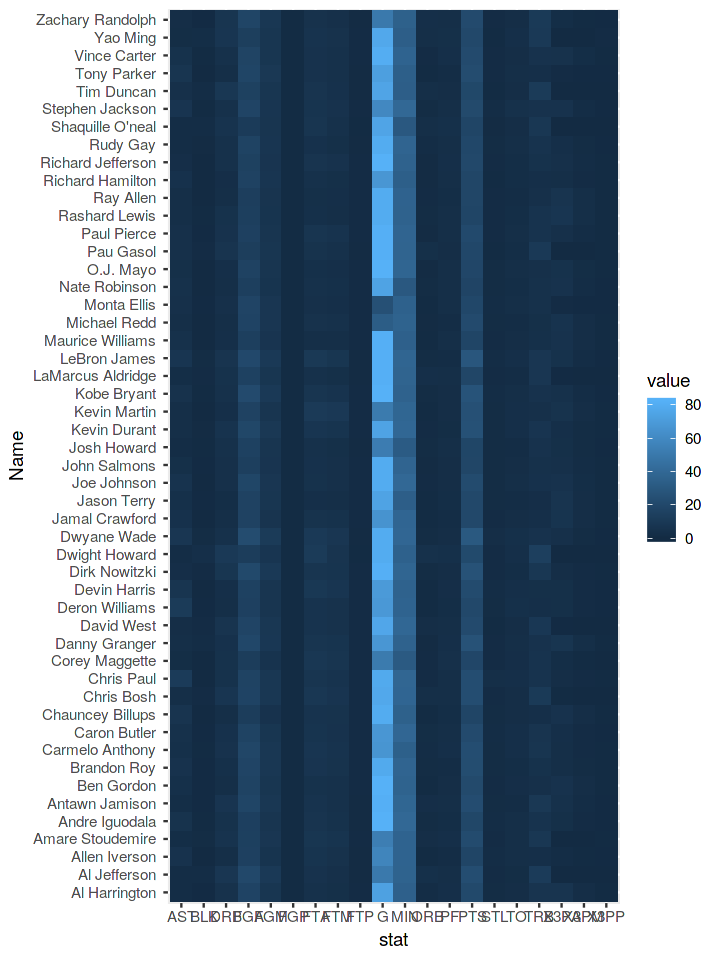

In [15]:
# Create basic heatmap of stat by player with the fill colored based on the value
# Due to large range in data, difficult to distinguish colors

options(repr.plot.width=6, repr.plot.height=8)
p = ggplot(nba.data, aes(x = stat, y = Name, fill = value))
p = p + geom_tile()
p

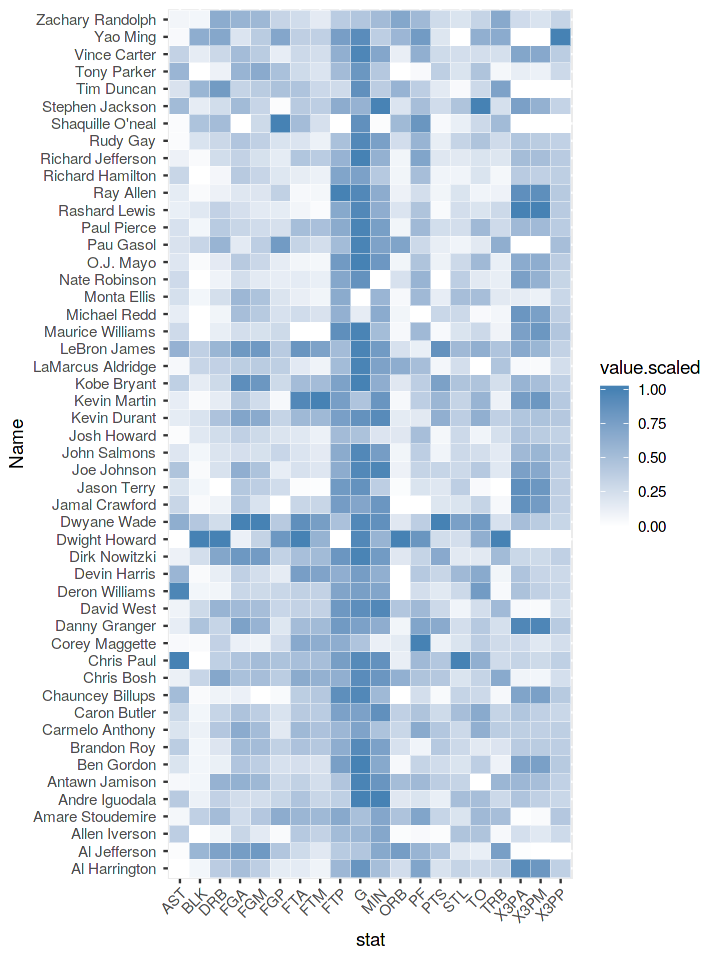

In [16]:
# Used scaled variable to create more distinguished colors
# Color argument for geom_title changes outline of tiles to white - can clearly distinguish boxes
# Adjusted color scale gradient
# Adjusted text

options(repr.plot.width=6, repr.plot.height=8)
p = ggplot(nba.data, aes(x = stat, y = Name, fill = value.scaled))
p = p + geom_tile(color = 'white')
p = p + scale_fill_gradient(low = "white", high = "steelblue")
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

## Distributions: Points with jitter

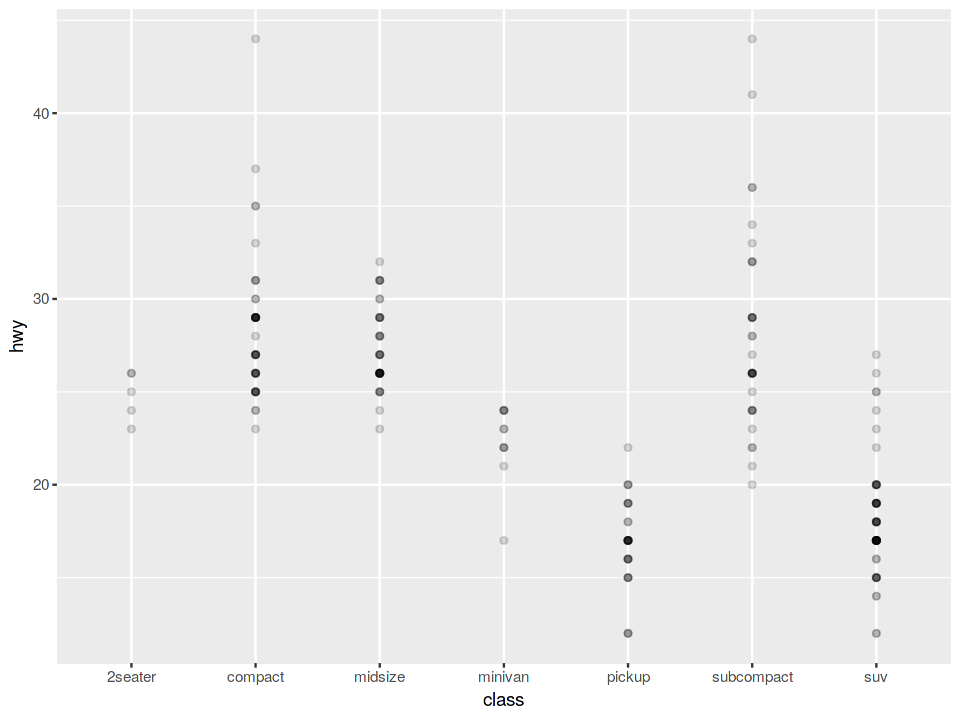

In [17]:
# Create basic scatterplot, difficult to see if there's multiple points in same spot
# Using alpha kind of helps

options(repr.plot.width=8, repr.plot.height=6)
p = ggplot(mpg, aes(x = class, y = hwy))
p = p + geom_point(alpha = 0.15)
p

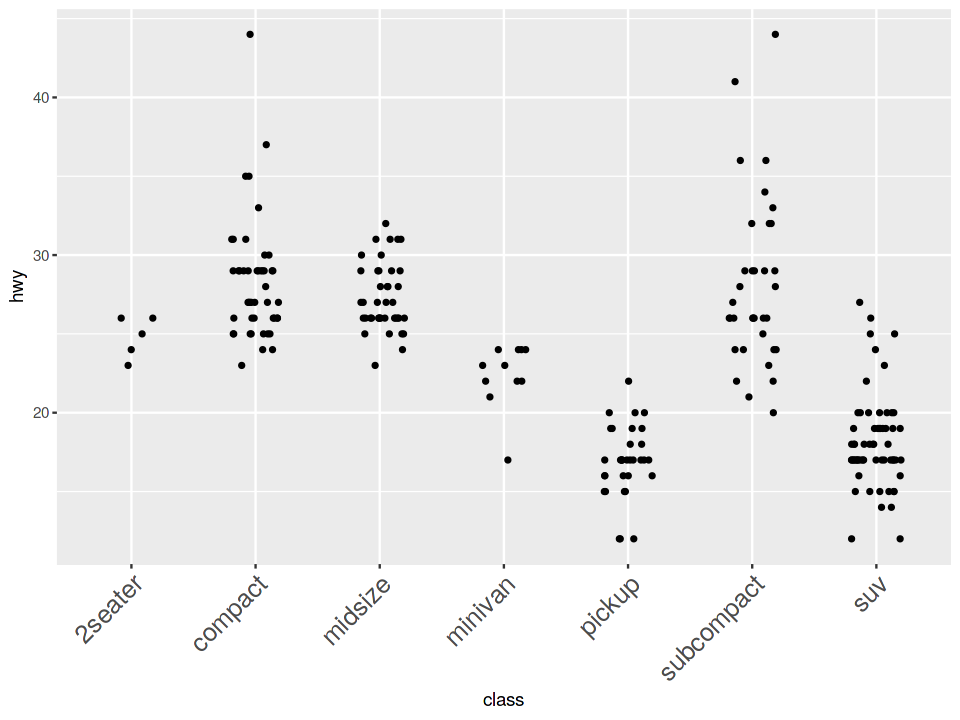

In [18]:
# Added jitter to plot

options(repr.plot.width=8, repr.plot.height=6)
p = ggplot(mpg, aes(x = class, y = hwy))
p = p + geom_point(position = position_jitter(h = 0, w = 0.20), size = 1)
p = p + theme(axis.text.x = element_text(size = 15, angle = 45, hjust = 1))
p

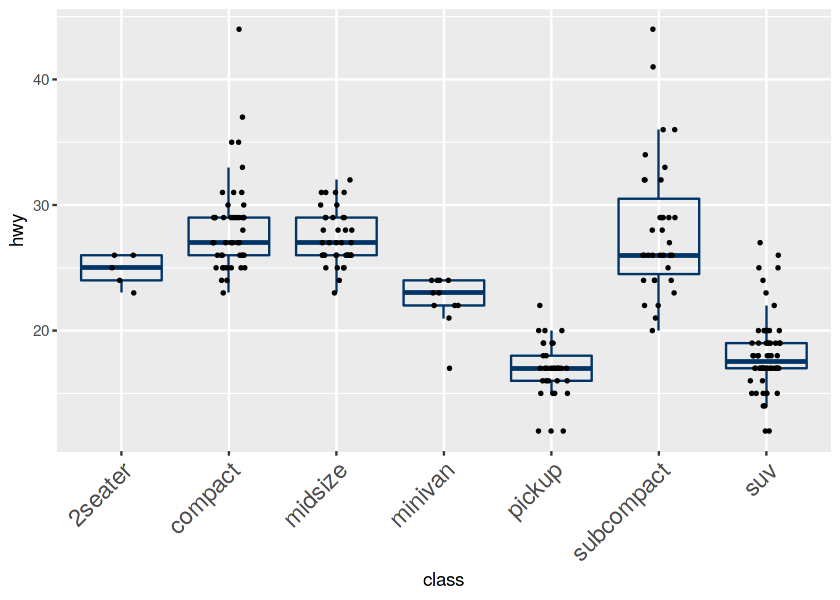

In [19]:
# Create boxplot and jittered points

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(mpg, aes(x = class, y = hwy))
p = p + geom_boxplot(fill = NA, outlier.shape = NA, color = '#003366')
p = p + geom_point(position = position_jitter(h = 0, w = 0.15), size = 0.5)
p = p + theme(axis.text.x = element_text(size = 14, angle = 45, hjust = 1))
p

## Extra Code

In [20]:
# Creates table from mpg data split by class, showing the count for each class
mpg$class %>% table

.
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         5         47         41         11         33         35         62 